<h2>Variables that make sellers more successful than others.</h2>

Setting up environment

In [104]:
import os
from pathlib import Path
home = os.getcwd()
current = home
while 'mid' not in os.listdir(current):
    current = Path(current).parent
DATA_FOLDER = os.path.join(current, 'mid')

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sellers = pd.read_csv(os.path.join(DATA_FOLDER, 'olist_sellers_dataset.csv'))
order_items = pd.read_csv(os.path.join(DATA_FOLDER, 'order_item_top_products.csv'))
orders = pd.read_csv(os.path.join(DATA_FOLDER, 'olist_orders_dataset.csv'))

<h4>Location and delivery time</h4>

In [106]:
# Merge datasets
merged_data = pd.merge(sellers, order_items, on='seller_id')
merged_data = pd.merge(merged_data, orders, on='order_id')

# calculate delivery time for each order
merged_data["delivery_time"] = pd.to_datetime(merged_data["order_delivered_customer_date"]) - pd.to_datetime(merged_data["order_purchase_timestamp"])
merged_data["delivery_time"] = merged_data["delivery_time"].dt.total_seconds() / 3600

# Display merged_data to check if the merge was successful
merged_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,rank,count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,885bfb849481052082fdecde1e4b724a,1,3ce21e38e6a3060c20f4e74bdab770c8,2017-11-27 08:35:33,64.9,17.16,1123,14,8871744f347a26868d7ac1756c0cebb5,delivered,2017-11-18 08:18:13,2017-11-18 08:36:03,2017-11-20 18:21:35,2017-11-27 20:06:45,2017-12-11 00:00:00,227.808889
1,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,e3d7c52182ad0917d1d2dd351dc1ef3a,1,3ce21e38e6a3060c20f4e74bdab770c8,2018-03-09 00:31:17,64.9,17.16,1123,14,a66532abc4d021fe04fa2a8e8ad63381,delivered,2018-03-01 00:15:48,2018-03-01 00:31:17,2018-03-01 21:18:06,2018-03-09 18:08:34,2018-03-21 00:00:00,209.879444
2,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,6ceabf34d230c31f161988dd2ff8fa92,1,3ce21e38e6a3060c20f4e74bdab770c8,2017-10-19 21:35:17,58.9,25.25,1123,14,4f6f5e2d1fabd46160eaf3c2e71c9cc6,delivered,2017-10-10 20:21:13,2017-10-10 20:35:17,2017-10-11 18:23:35,2017-10-31 19:47:24,2017-11-10 00:00:00,503.436389
3,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,8e44776431d64c356d997ac00b74fcb7,1,3ce21e38e6a3060c20f4e74bdab770c8,2017-11-23 02:46:18,58.9,17.12,1123,14,fd8cd2759780f318fc3f5b9856cad495,delivered,2017-11-14 11:28:24,2017-11-15 02:46:18,2017-11-16 18:04:55,2017-11-21 17:22:50,2017-12-06 00:00:00,173.907222
4,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,6638967e5dd4744b8bb5be1be7901f07,1,3ce21e38e6a3060c20f4e74bdab770c8,2017-10-23 10:56:18,58.9,25.25,1123,14,1c52f1181d55c6ea11991df0075cf71c,delivered,2017-10-14 09:41:51,2017-10-14 09:56:18,2017-10-16 16:38:43,2017-10-28 16:26:41,2017-11-07 00:00:00,342.747222


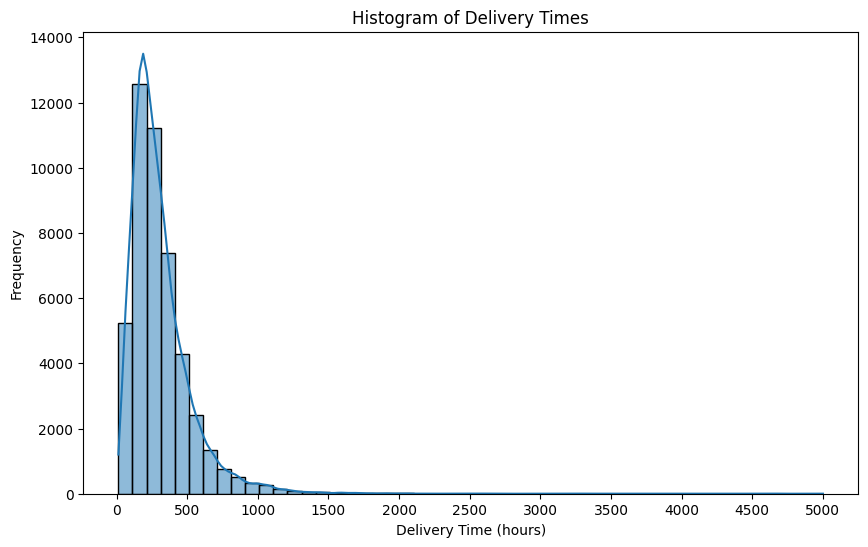

In [107]:
# Histogram of delivery times
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['delivery_time'], bins=50, kde=True)
plt.xticks(np.arange(0, 5500, step=500))
plt.title('Histogram of Delivery Times')
plt.xlabel('Delivery Time (hours)')
plt.ylabel('Frequency')
plt.show()


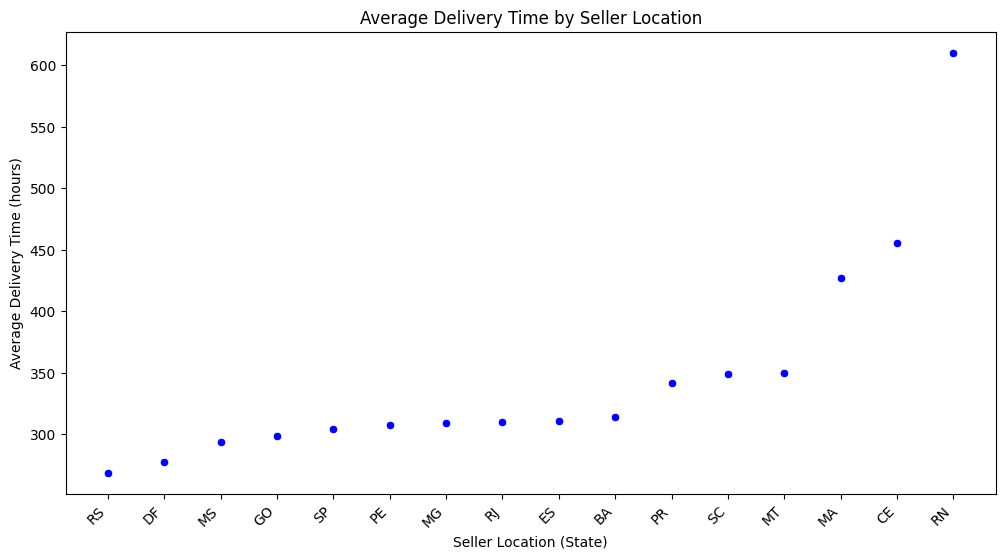

In [108]:
# Calculate the average delivery time for each seller
avg_delivery_time_by_state= merged_data.groupby('seller_state')['delivery_time'].mean().reset_index().sort_values(by="delivery_time")

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='seller_state', y='delivery_time', data=avg_delivery_time_by_state, color='blue')
plt.title('Average Delivery Time by Seller Location')
plt.xlabel('Seller Location (State)')
plt.ylabel('Average Delivery Time (hours)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [109]:
order_count = merged_data.groupby("seller_state")["order_id"].agg(["count"]).sort_values(by="count").reset_index()
order_count.columns = ["seller_state",'count']
order_count

,seller_state,count
0,MS,1
1,RN,14
2,CE,30
3,MT,46
4,GO,135
5,DF,212
6,ES,225
7,MA,317
8,PE,376
9,BA,405


In [110]:
from scipy.stats import kruskal

# Merge the two DataFrames to have counts for each state
merged_data_count = pd.merge(avg_delivery_time_by_state, order_count, on='seller_state')

# Perform Kruskal-Wallis H-test
h_statistic, p_value = kruskal(*[group['delivery_time'] for name, group in merged_data_count.groupby('seller_state')])

# Print results
print(f'H-statistic: {h_statistic}')
print(f'P-value: {p_value}')

H-statistic: 15.0
P-value: 0.4514172112257257


In the context of the Kruskal-Wallis test:

Null Hypothesis (H0): The distributions of delivery times are the same across all seller states.

Alternative Hypothesis (H1): At least one seller state has a different distribution of delivery times.

The p-value of 0.4514 is greater than the common significance level of 0.05. Therefore, we do not have enough evidence to reject the null hypothesis. This suggests that, based on the Kruskal-Wallis test, there is not enough evidence to conclude that the distributions of delivery times are significantly different among the seller states.

Let us compare the top two cities SP and MG to see if there is an effect of location on delivery time

In [111]:
df_sp = merged_data[merged_data['seller_state'] == 'SP'].groupby('seller_id')['delivery_time'].mean().reset_index()
df_sp.rename(columns={'delivery_time': 'average_delivery_time_SP'}, inplace=True)

print("Dataframe for sellers from SP:")
df_sp

Dataframe for sellers from SP:


,seller_id,average_delivery_time_SP
0,002100f778ceb8431b7a1020ff7ab48f,431.371944
1,004c9cd9d87a3c30c522c48c4fc07416,339.052842
2,00ee68308b45bc5e2660cd833c3f81cc,231.757899
3,01ed254b9ff8407dfb9d99ba1e17d923,122.209236
4,01fd077212124329bac32490e8ef80d9,169.906731
...,...,...
414,fe2032dab1a61af8794248c8196565c9,267.663021
415,febab0275244b9a49a623f0bd613ca2f,227.021499
416,ff063b022a9a0aab91bad2c9088760b7,220.322863
417,ff1fb4c404b2efe68b03350a8dc24122,277.673529


In [112]:
# Create second dataframe for sellers from state MG
df_mg = merged_data[merged_data['seller_state'] == 'MG'].groupby('seller_id')['delivery_time'].mean().reset_index()
df_mg.rename(columns={'delivery_time': 'average_delivery_time_MG'}, inplace=True)

print("\nDataframe for sellers from MG:")
df_mg


Dataframe for sellers from MG:


,seller_id,average_delivery_time_MG
0,0509040ea3fe50071181bbc359eb7738,286.109306
1,05f51e13da97139648b8125c31e5f51b,NaN
2,080102cd0a76b09e0dcf55fcacc60e05,204.409293
3,0c8380b62e38e8a1e6adbeba7eb9688c,386.437049
4,0cbcee27c791afa0cdcb08587a2013a8,311.494297
...,...,...
58,daeb5653dd96c1b11860f72209795012,198.087222
59,dbc22125167c298ef99da25668e1011f,259.436793
60,e99e927c81e3f51739c94fcdfca9f10f,334.534392
61,f62d7bb4a613ec758a03342d46b580b2,332.930330


In [126]:
seller_counts = merged_data.groupby('seller_state')['seller_id'].nunique().sort_values()
seller_counts

seller_state
ES      1
MA      1
MS      1
MT      1
RN      1
CE      2
PE      2
BA      3
DF      7
GO      7
RS     19
SC     35
RJ     43
MG     63
PR     70
SP    419
Name: seller_id, dtype: int64

[0.513549716370058]

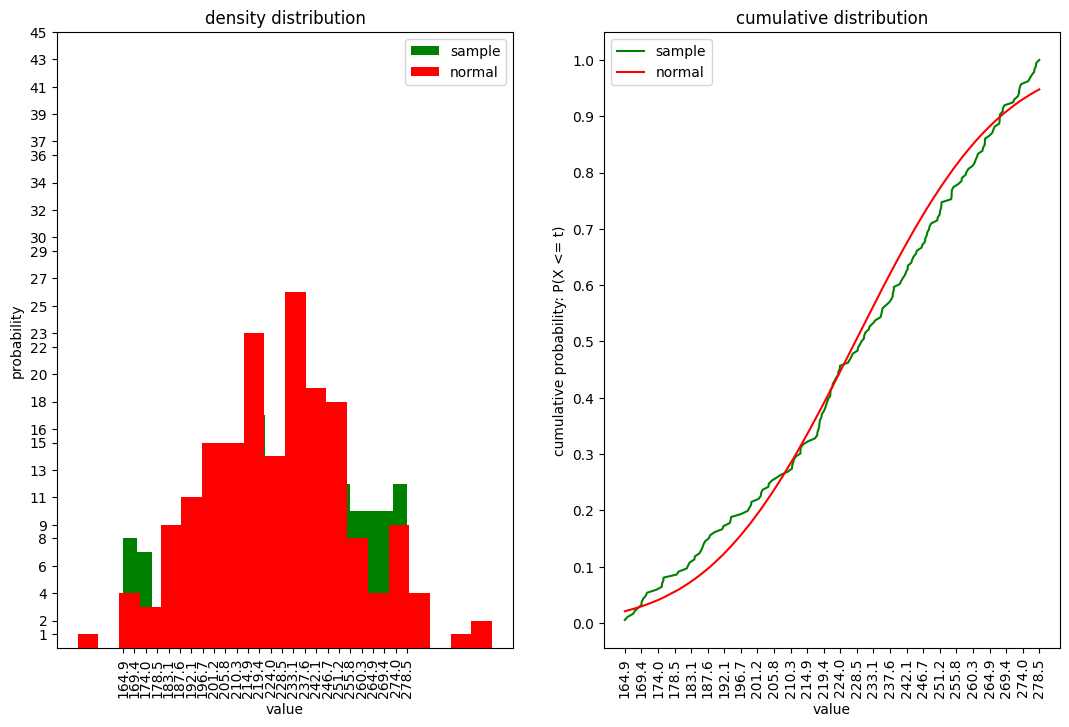

In [113]:
from stats_utils import remove_outliers, test_sample_normal_distribution
sp_avg_dt = remove_outliers(df_sp['average_delivery_time_SP'].dropna().sort_values())
test_sample_normal_distribution(sp_avg_dt, random_state=42, display=True)

[0.9532746035485491]

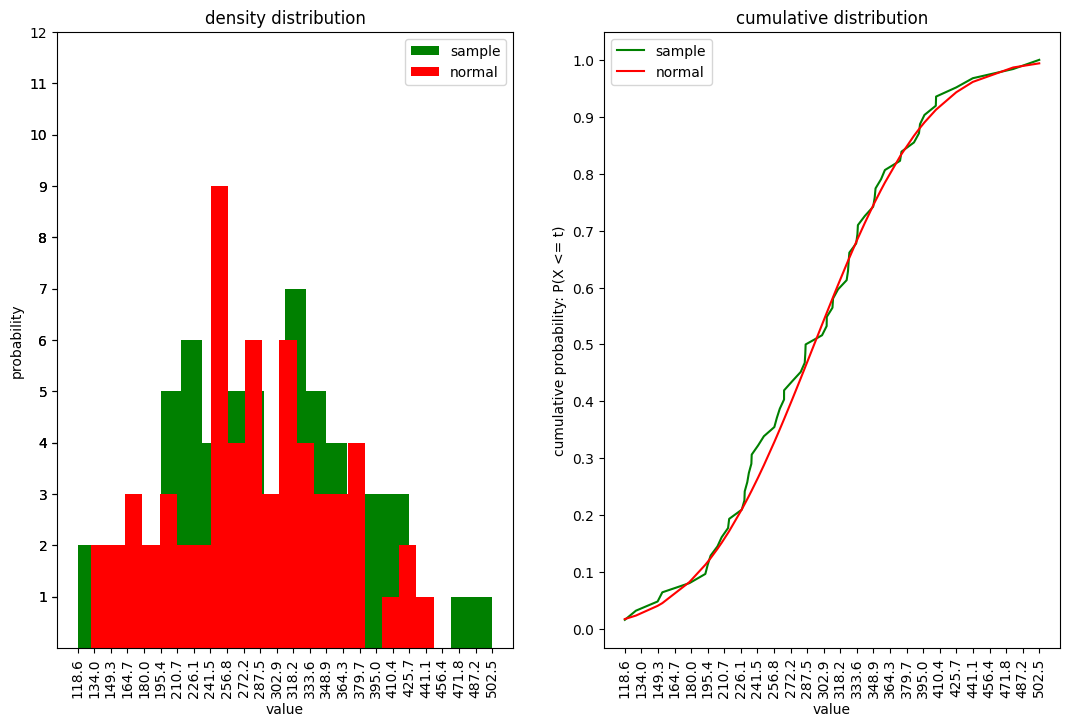

In [114]:
# from stats_utils import remove_outliers, test_sample_normal_distribution
mg_avg_dt = df_mg['average_delivery_time_MG'].dropna().sort_values()
test_sample_normal_distribution(mg_avg_dt, random_state=42, display=True)

In [115]:
from scipy.stats import ttest_ind

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(sp_avg_dt, mg_avg_dt, equal_var=False)

print("Two-Sample T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value > 0.05:
    print("Fail to reject the null hypothesis. There is no significant difference between the means.")
else:
    print("Reject the null hypothesis. There is a significant difference between the means.")

Two-Sample T-Test Results:
T-Statistic: -6.050625012501027
P-value: 7.344399878105218e-08
Reject the null hypothesis. There is a significant difference between the means.
